In [1]:
from meta_info import *
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.stats import linregress
from os.path import join
import numpy as np
import pandas as pd
from tqdm import tqdm
from tools import *
from plot import *
from spei import *

In [ ]:
fpath='D:/Data/SPEI/Source/spei03.nc'

In [ ]:
trend, p_values=calculate_trend_and_p(fpath, gs='annual', method='mean')

trend_sig=trend_sig(trend, p_values)

In [ ]:
drought_times, drought_frequency, drought_duration, drought_intensity = drought_statistic(dataset, threshold=-0.5, )

In [ ]:
plot_spei2d(p_values, global_cmap, vmax=0.05)

In [16]:
xr.open_dataset(r'D:\Data\SPEI\Source/spei03.nc').spei

<xarray.DataArray 'spei' (time: 1464, lat: 360, lon: 720)> Size: 2GB
[379468800 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2022-12-16
Attributes:
    units:         1
    long_name:     Standardized Precipitation-Evapotranspiration Index
    grid_mapping:  crs

In [3]:
drought_statistic(xr.open_dataset(r'D:\Data\SPEI\Source/spei03.nc').spei, threshold=-0.5)

Processing Latitude:   0%|          | 0/360 [00:00<?, ?it/s]

In [38]:
def pixel_area_ratio_statistics(dataset,  all_area_mask, condition_value = 0.05 , type = '>='):

    if type == ">=":
        mask = (dataset >= condition_value)
    elif type == ">":
        mask = (dataset > condition_value)
    elif type == "<=":
        mask = (dataset <= condition_value)
    elif type == "<":
        mask = (dataset < condition_value)
    elif type == "==":
        mask = (dataset == condition_value)

    pixel_count= mask.sum().item()
    pixel_count_ratio = (mask.sum().item()) /(all_area_mask.sum().item())
    total_area = calculate_area(dataset, mask)
    total_area_ratio = calculate_area(dataset, mask)/calculate_area(dataset, all_area_mask)

    return {'pixel_count':pixel_count,'pixel_count_ratio':pixel_count_ratio,'total_area':total_area,'total_area_ratio':total_area_ratio}
def drought_statistics(dataset, quantile =0.5):
 
    min = dataset.min().values
    max = dataset.max().values
    mean = dataset.mean().values
    sum = dataset.sum().values
    std = dataset.std().values
    var = dataset.var().values
    median = dataset.median().values
    count = dataset.count().values
    quantile = dataset.quantile(quantile).values 

    return {'min': min,'max':max,'mean':mean,'sum':sum,'std':std,'var':var,'median':median,'count':count,'quantile':quantile} 
def run_drought_statistics(drought_times, drought_frequency, drought_duration, drought_intensity ,quantile =0.5):

    drought_times_statistics = drought_statistics(drought_times, quantile)
    drought_frequency_statistics = drought_statistics(drought_frequency, quantile)
    drought_duration_statistics = drought_statistics(drought_duration, quantile)
    drought_intensity_statistics = drought_statistics(drought_intensity, quantile)

    return f'drought_times:{drought_times_statistics}', f'drought_frequency:{drought_frequency_statistics}', f'drought_duration{drought_duration_statistics}' , f'drought_intensity:{drought_intensity_statistics}'

In [2]:
trend=xr.open_dataset(r'D:\Data\SPEI\Result\trend.nc').spei
trend_sig=xr.open_dataset(r'D:\Data\SPEI\Result\trend_sig.nc').spei
drought_times=xr.open_dataset(r'D:\Data\SPEI\Result\drought_times.nc').spei
drought_frequency=xr.open_dataset(r'D:\Data\SPEI\Result\drought_frequency.nc').spei
drought_duration=xr.open_dataset(r'D:\Data\SPEI\Result\drought_duration.nc').spei
drought_intensity=xr.open_dataset(r'D:\Data\SPEI\Result\drought_intensity.nc').spei
p_values=xr.open_dataset(r'D:\Data\SPEI\Result\p_values.nc').spei

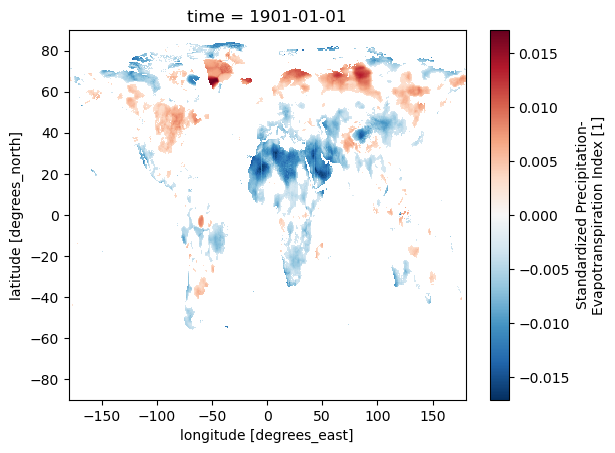

In [27]:
trend.where(p_values<=0.05).plot()

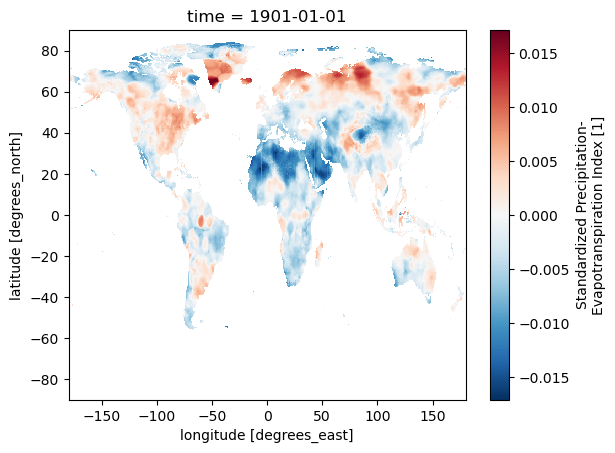

In [35]:
trend.plot()

In [39]:
pixel_area_ratio_statistics(trend.where((p_values<=0.05) & (trend>0)), ~trend.isnull(), condition_value=0, type= ">")

{'pixel_count': 12451,
 'pixel_count_ratio': 0.18723026721402686,
 'total_area': 22105248738446.21,
 'total_area_ratio': 0.1526070469982258}

In [40]:
pixel_area_ratio_statistics(trend.where((p_values<=0.05) & (trend<0)), ~trend.isnull(), condition_value=0, type= "<")

{'pixel_count': 22217,
 'pixel_count_ratio': 0.3340852017262898,
 'total_area': 52029422040714.53,
 'total_area_ratio': 0.359193264396443}

In [34]:
pixel_area_ratio_statistics(trend, ~trend.isnull(), condition_value=0, type= ">")

{'pixel_count': 28112,
 'pixel_count_ratio': 0.4227304852558608,
 'total_area': 56075305936619.016,
 'total_area_ratio': 0.38712465757628106}

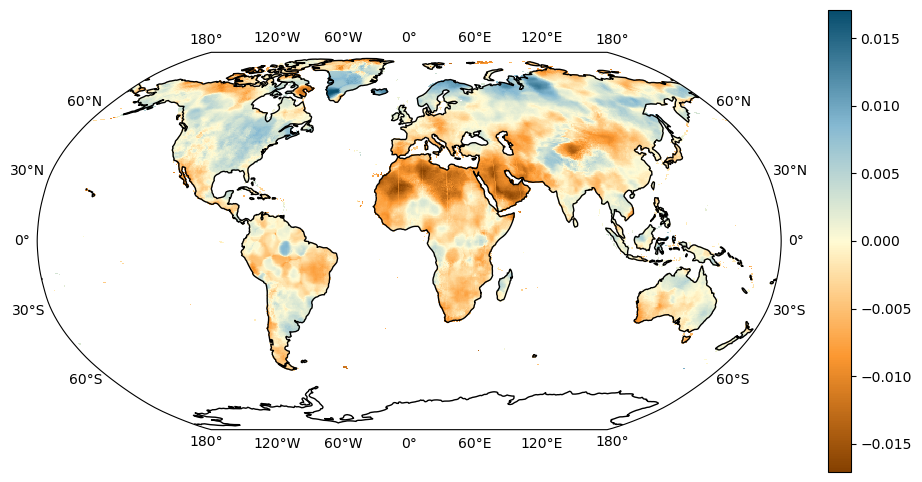

In [3]:
plot_spei2d(trend, global_cmap)

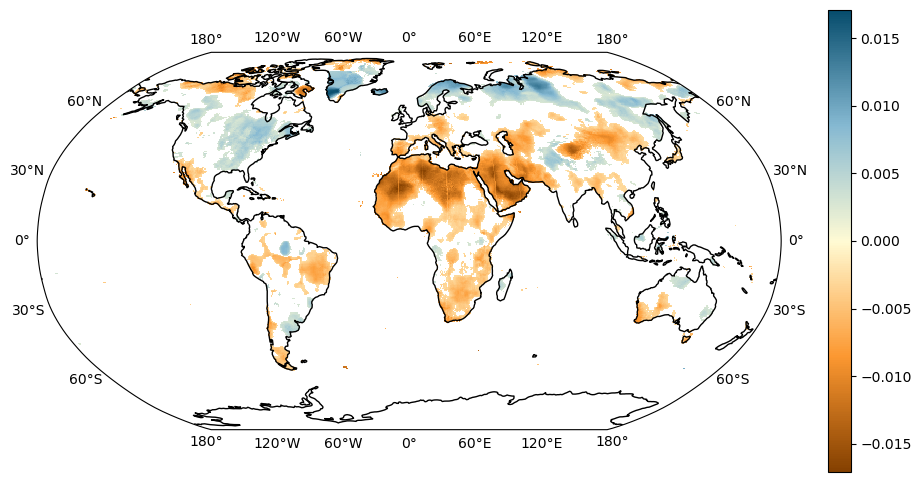

In [4]:
plot_spei2d(trend_sig, global_cmap)

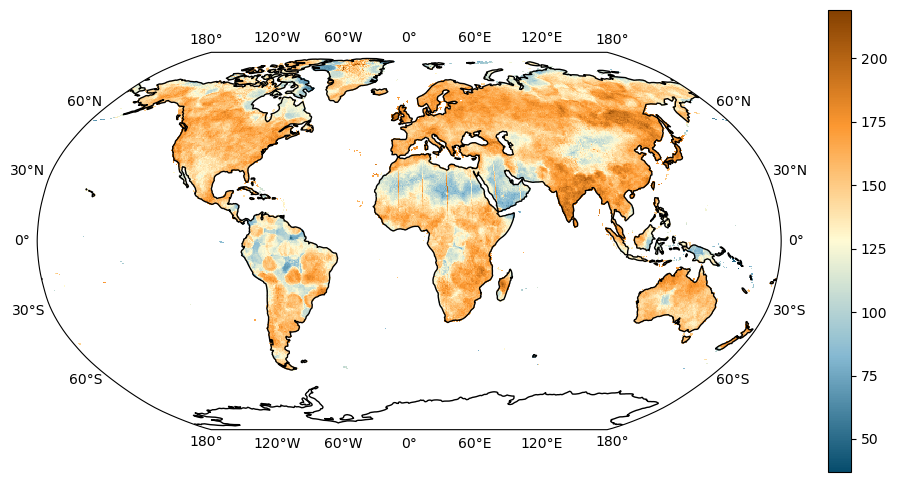

In [5]:
plot_spei2d(drought_times, cmap=global_cmap_r,)

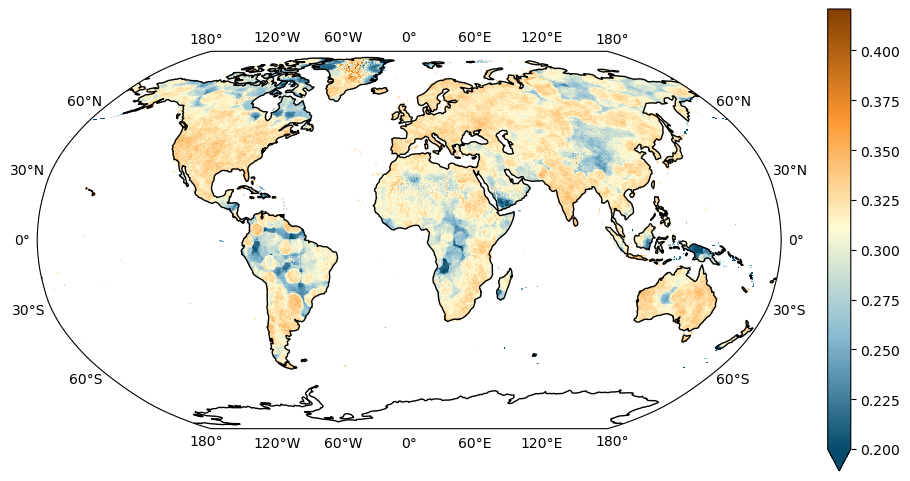

In [6]:
plot_spei2d(drought_frequency, cmap=global_cmap_r, vmin=0.2)

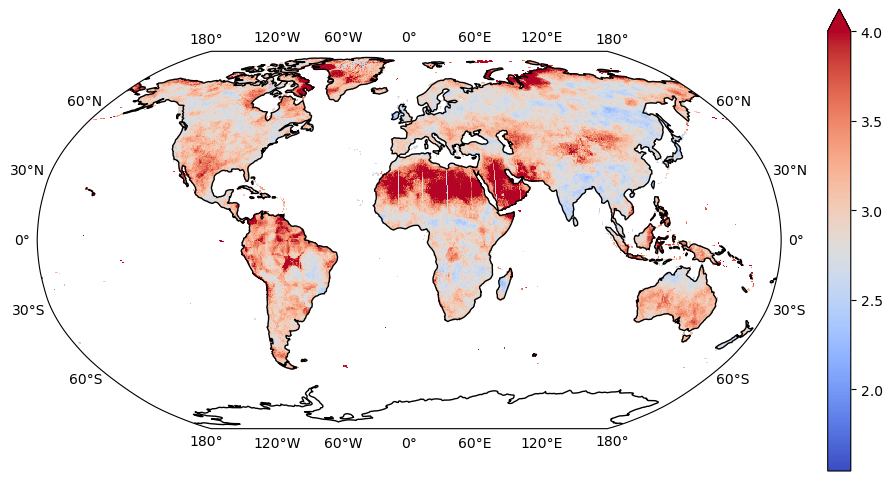

In [7]:
plot_spei2d(drought_duration, cmap='coolwarm', vmax=4)

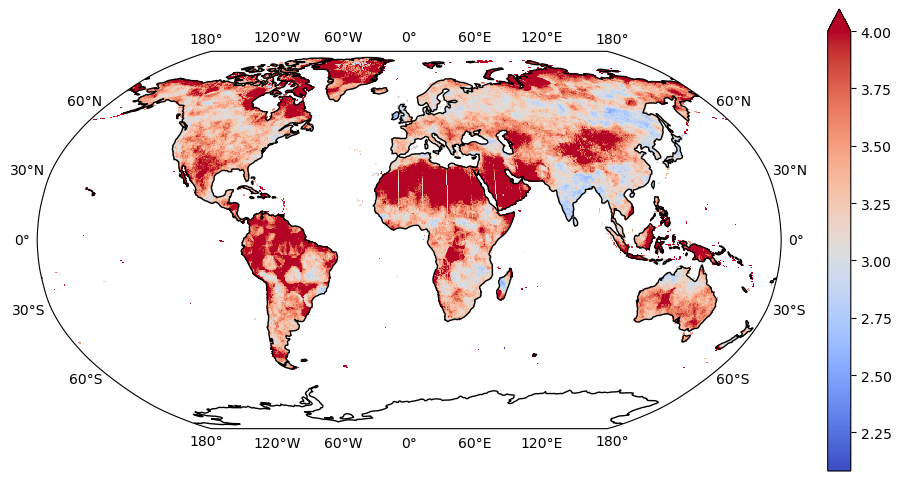

In [8]:
plot_spei2d(drought_intensity, cmap='coolwarm',vmax=4)

In [46]:
run_drought_statistics(drought_times, drought_frequency, drought_duration, drought_intensity )[3]

"drought_intensity:{'min': array(2.0816782, dtype=float32), 'max': array(10.281244, dtype=float32), 'mean': array(3.6329293, dtype=float32), 'sum': array(241593.44, dtype=float32), 'std': array(0.6501343, dtype=float32), 'var': array(0.42267466, dtype=float32), 'median': array(3.4560642, dtype=float32), 'count': array(66501), 'quantile': array(3.45606422)}"

In [13]:
(drought_times>100).sum()/(drought_times>=0).sum()

<xarray.DataArray 'spei' ()> Size: 8B
array(0.95482775)
Coordinates:
    time     datetime64[ns] 8B 1902-01-16

In [24]:
calculate_area(drought_times, 100)/calculate_area(drought_times, 0)

0.9566027328289423

In [19]:
aa=drought_times.sel(lon=slice(113, 154), lat=slice(-44, -10)) #澳大利亚经纬度范围，验证求面积函数的准确性

In [49]:
pixel_area_ratio_statistics(aa, condition_value=100, type= ">=")

{'pixel_count': 2966,
 'pixel_count_ratio': 0.994634473507713,
 'total_area': 8216537473077.496,
 'total_area_ratio': 0.9944038764206256}